In [86]:
import os
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join("..")))
import src.data_loader
importlib.reload(src.data_loader)
from src.data_loader import load_ospd_time_series, load_ospd_weather_data, merge_time_and_weather

sns.set(style="whitegrid")


In [87]:
load_df = load_ospd_time_series()
weather_df = load_ospd_weather_data()

display(load_df.head())
display(weather_df.head())

# Check datetime ranges
print("Load:", load_df["datetime"].min(), "to", load_df["datetime"].max())
print("Weather:", weather_df["datetime"].min(), "to", weather_df["datetime"].max())

# Check for missing values
print("Missing Load Data:\n", load_df.isnull().sum())
print("Missing Weather Data:\n", weather_df.isnull().sum())

# Print data length
print("Load Data Length:\n", load_df.shape[0])
print("Weather Data Length:\n", weather_df.shape[0])



,datetime,load,load_forecast,solar,solar_profile,wind,wind_profile
0,2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,41151.0,39723.0,NaN,NaN,8852.0,0.3171
2,2015-01-01 01:00:00+00:00,40135.0,38813.0,NaN,NaN,9054.0,0.3244
3,2015-01-01 02:00:00+00:00,39106.0,38490.0,NaN,NaN,9070.0,0.3249
4,2015-01-01 03:00:00+00:00,38765.0,38644.0,NaN,NaN,9163.0,0.3283


,datetime,temp,rad_direct,rad_diffuse
0,1980-01-01 00:00:00+00:00,-1.261,0.0,0.0
1,1980-01-01 01:00:00+00:00,-1.414,0.0,0.0
2,1980-01-01 02:00:00+00:00,-1.571,0.0,0.0
3,1980-01-01 03:00:00+00:00,-1.760,0.0,0.0
4,1980-01-01 04:00:00+00:00,-1.995,0.0,0.0


Load: 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Weather: 1980-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Missing Load Data:
 datetime            0
load                1
load_forecast      25
solar             104
solar_profile    6705
wind               75
wind_profile     6676
dtype: int64
Missing Weather Data:
 datetime       0
temp           0
rad_direct     0
rad_diffuse    0
dtype: int64
Load Data Length:
 50401
Weather Data Length:
 350640


In [88]:
df = merge_time_and_weather(load_df, weather_df)
display(df.head())
print("Dates:", df.index.min(), "to", df.index.max())
print("Missing Data:\n", df.isnull().sum())
print("Data Length:\n", load_df.shape[0])

,load,load_forecast,solar,solar_profile,wind,wind_profile,temp,rad_direct,rad_diffuse
datetime,,,,,,,,,
2015-01-01 07:00:00+00:00,41133.0,42522.0,71.0,0.0019,10208.0,0.3657,-1.692,0.4328,6.7680
2015-01-01 08:00:00+00:00,42963.0,45020.0,773.0,0.0207,10029.0,0.3593,-1.046,8.8773,51.9464
2015-01-01 09:00:00+00:00,45088.0,47101.0,2117.0,0.0568,10550.0,0.3780,0.072,34.1583,97.0929
2015-01-01 10:00:00+00:00,47013.0,49603.0,3364.0,0.0903,11390.0,0.4080,0.866,56.5458,120.2907
2015-01-01 11:00:00+00:00,48159.0,49910.0,4198.0,0.1127,12103.0,0.4336,1.493,62.8690,126.2112


Dates: 2015-01-01 07:00:00+00:00 to 2019-12-30 22:00:00+00:00
Missing Data:
 load             0
load_forecast    0
solar            0
solar_profile    0
wind             0
wind_profile     0
temp             0
rad_direct       0
rad_diffuse      0
dtype: int64
Data Length:
 50401


In [90]:
# Time features
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)

# Lag features
df["load_t-1"] = df["load"].shift(1)
df["load_t-24"] = df["load"].shift(24)

# lag weather since we technically can't use weather at t to predict t
df["temp_t-1"] = df["temp"].shift(1)
df["rad_direct_t-1"] = df["rad_direct"].shift(1)
df["rad_diffuse_t-1"] = df["rad_diffuse"].shift(1)


# Rolling mean
df["load_rolling_24h"] = df["load"].rolling(24).mean()

# Drop rows with NA values (from shift/roll)
df = df.dropna()
df.head()

,load,load_forecast,solar,solar_profile,wind,wind_profile,temp,rad_direct,rad_diffuse,hour,dayofweek,is_weekend,load_t-1,load_t-24,temp_t-1,rad_direct_t-1,rad_diffuse_t-1,load_rolling_24h
datetime,,,,,,,,,,,,,,,,,,
2015-01-02 07:00:00+00:00,54131.0,51540.0,38.0,0.0010,26590.0,0.9522,0.893,0.2572,6.4205,7,4,0,50418.0,41133.0,0.486,0.0000,0.0000,46776.000000
2015-01-02 08:00:00+00:00,56505.0,53133.0,252.0,0.0068,25934.0,0.9287,1.577,1.5738,35.8543,8,4,0,54131.0,42963.0,0.893,0.2572,6.4205,47340.250000
2015-01-02 09:00:00+00:00,58447.0,54446.0,667.0,0.0179,25641.0,0.9182,2.327,3.6359,68.0313,9,4,0,56505.0,45088.0,1.577,1.5738,35.8543,47896.875000
2015-01-02 10:00:00+00:00,59453.0,55685.0,1262.0,0.0339,25810.0,0.9242,3.027,7.9580,100.6625,10,4,0,58447.0,47013.0,2.327,3.6359,68.0313,48415.208333
2015-01-02 11:00:00+00:00,59201.0,55627.0,1726.0,0.0463,25642.0,0.9182,3.517,10.5469,112.3497,11,4,0,59453.0,48159.0,3.027,7.9580,100.6625,48875.291667


In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

df["forecast_error"] = df["load_forecast"] - df["load"]
df["abs_error"] = np.abs(df["forecast_error"])
df["squared_error"] = df["forecast_error"] ** 2
df["pct_error"] = df["abs_error"] / df["load"] * 100

mae = mean_absolute_error(df["load"], df["load_forecast"])
rmse = np.sqrt(mean_squared_error(df["load"], df["load_forecast"]))
mape = df["pct_error"].mean()

print(f"MAE:  {mae:.2f} MW")
print(f"RMSE: {rmse:.2f} MW")
print(f"MAPE: {mape:.2f}%")

MAE:  1719.05 MW
RMSE: 2234.99 MW
MAPE: 3.08%


C:\Users\mrcan\AppData\Local\Temp\ipykernel_37844\2842411267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["forecast_error"] = df["load_forecast"] - df["load"]
C:\Users\mrcan\AppData\Local\Temp\ipykernel_37844\2842411267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["abs_error"] = np.abs(df["forecast_error"])
C:\Users\mrcan\AppData\Local\Temp\ipykernel_37844\2842411267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

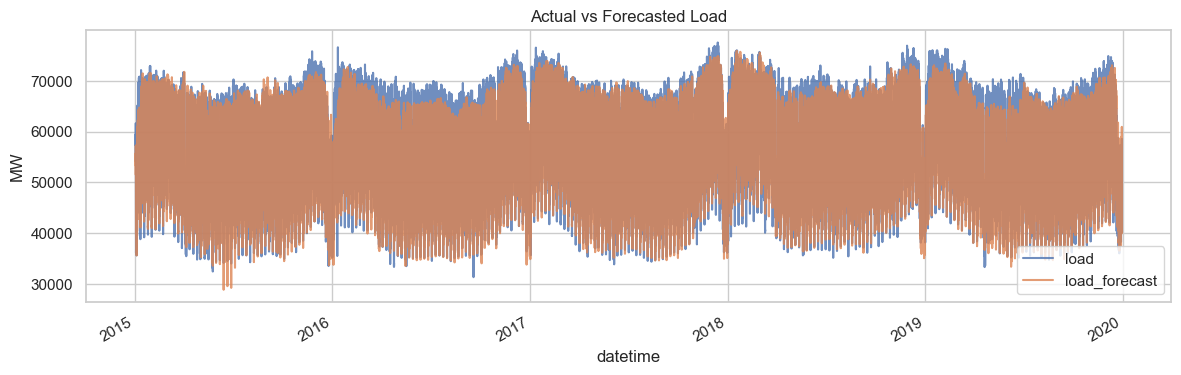

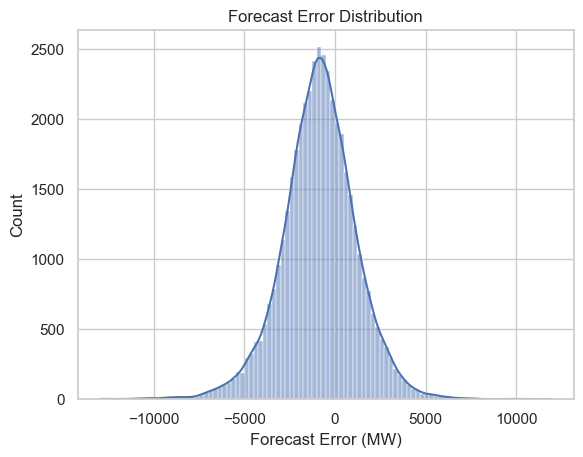

In [92]:
# Plot actual vs forecast
df[["load", "load_forecast"]].plot(figsize=(14, 4), alpha=0.8)
plt.title("Actual vs Forecasted Load")
plt.ylabel("MW")
plt.show()

# Forecast error distribution
sns.histplot(df["forecast_error"], bins=100, kde=True)
plt.title("Forecast Error Distribution")
plt.xlabel("Forecast Error (MW)")
plt.show()

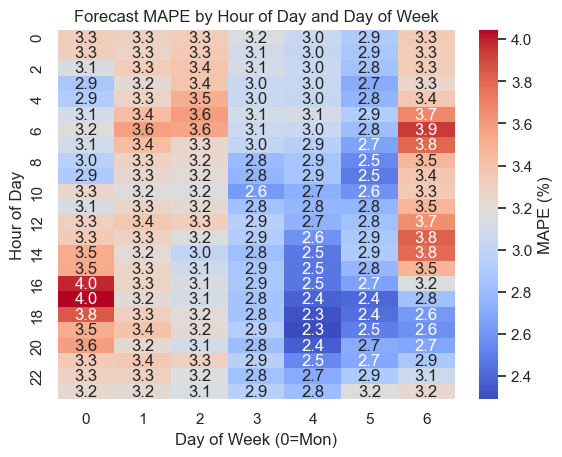

In [93]:
heatmap_df = df.groupby(["hour", "dayofweek"])["pct_error"].mean().unstack()
sns.heatmap(heatmap_df, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={"label": "MAPE (%)"})
plt.title("Forecast MAPE by Hour of Day and Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Hour of Day")
plt.show()


In [94]:
import holidays
df['date_only'] = df.index.date
#print(df['date_only'])
years = df.index.year.unique()
min_year, max_year = years.min(), years.max()
de_holidays = holidays.country_holidays("DE", years=range(min_year, max_year+1))
df['is_holiday'] = df['date_only'].isin(de_holidays).astype(int)
print(df[['is_holiday']].value_counts())


is_holiday
0             42566
1              1080
Name: count, dtype: int64


C:\Users\mrcan\AppData\Local\Temp\ipykernel_37844\775353312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_only'] = df.index.date
C:\Users\mrcan\AppData\Local\Temp\ipykernel_37844\775353312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_holiday'] = df['date_only'].isin(de_holidays).astype(int)


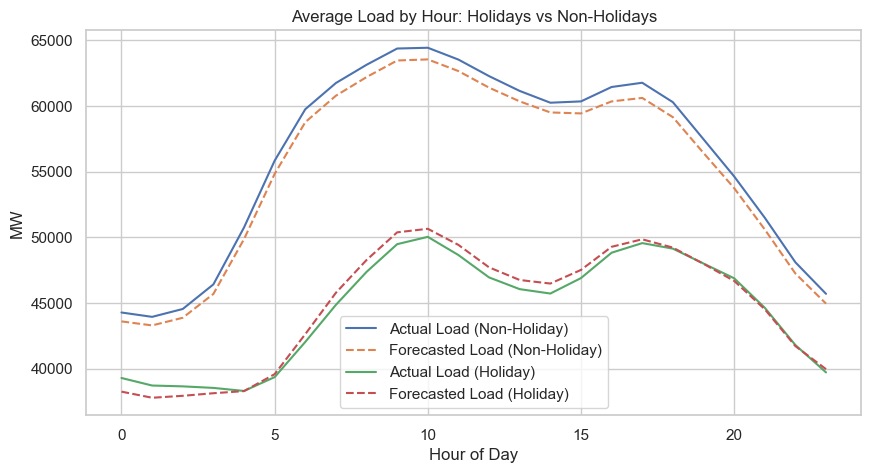

In [95]:
# Group by hour and holiday flag
avg_by_hour = df.groupby(["is_holiday", "hour"])[["load", "load_forecast"]].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
for is_holiday, label in zip([0, 1], ["Non-Holiday", "Holiday"]):
    subset = avg_by_hour[avg_by_hour["is_holiday"] == is_holiday]
    plt.plot(subset["hour"], subset["load"], label=f"Actual Load ({label})", linestyle='-')
    plt.plot(subset["hour"], subset["load_forecast"], label=f"Forecasted Load ({label})", linestyle='--')

plt.title("Average Load by Hour: Holidays vs Non-Holidays")
plt.xlabel("Hour of Day")
plt.ylabel("MW")
plt.legend()
plt.grid(True)
plt.show()


In [96]:
df.columns

Index(['load', 'load_forecast', 'solar', 'solar_profile', 'wind',
       'wind_profile', 'temp', 'rad_direct', 'rad_diffuse', 'hour',
       'dayofweek', 'is_weekend', 'load_t-1', 'load_t-24', 'temp_t-1',
       'rad_direct_t-1', 'rad_diffuse_t-1', 'load_rolling_24h',
       'forecast_error', 'abs_error', 'squared_error', 'pct_error',
       'date_only', 'is_holiday'],
      dtype='object')

# Modeling
## Linear Regression

In [110]:
# Define feature columns
feature_cols = [
    "load_t-1", "load_t-24",
    "temp_t-1", "rad_direct_t-1", "rad_diffuse_t-1",
    "hour", "dayofweek", "is_weekend", "is_holiday"
]

# Drop any remaining NaNs (just in case)
model_df = df[feature_cols].dropna()

# Feature matrix (X) and target vector (y)
X = model_df[feature_cols]
X = pd.get_dummies(X, columns=["dayofweek"], drop_first=True)
y = df.loc[X.index, "load"]


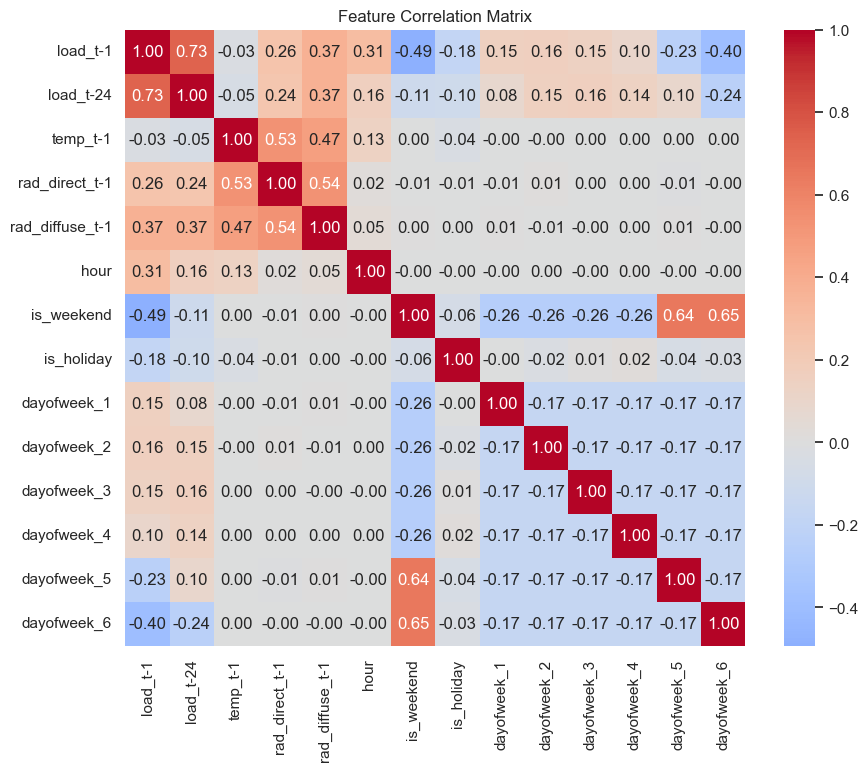

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [112]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def MAE(y_true, y_pred):
    return np.abs(y_pred - y_true).mean()

def RMSE(y_true, y_pred):
    return np.sqrt(((y_pred - y_true)**2).mean())

def MAPE(y_true, y_pred):
    return (np.abs(y_pred - y_true) / y_true * 100).mean()

In [113]:
split_idx = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [114]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mae = MAE(y_test, y_pred)
rmse = RMSE(y_test, y_pred)
mape = MAPE(y_test, y_pred)

print(f"Linear Regression MAE:  {mae:.2f} MW")
print(f"Linear Regression RMSE: {rmse:.2f} MW")
print(f"Linear Regression MAPE: {mape:.2f} %")

Linear Regression MAE:  1387.54 MW
Linear Regression RMSE: 1853.44 MW
Linear Regression MAPE: 2.59 %


In [115]:
tscv = TimeSeriesSplit(n_splits=5)
mae_scores, rmse_scores, mape_scores = [], [], []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = MAE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)

    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)

print(f"Avg MAE: {np.mean(mae_scores):.2f} MW")
print(f"Avg RMSE: {np.mean(rmse_scores):.2f} MW")
print(f"Avg MAPE: {np.mean(mape_scores):.2f} %")

Avg MAE: 1418.05 MW
Avg RMSE: 1896.66 MW
Avg MAPE: 2.65 %


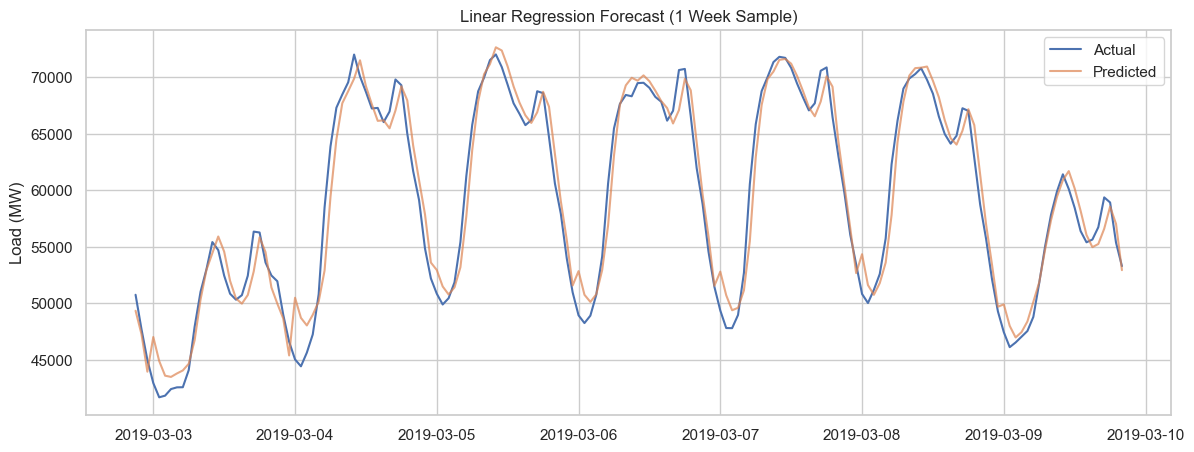

In [116]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.index[:168], y_test[:168], label="Actual")
plt.plot(y_test.index[:168], y_pred[:168], label="Predicted", alpha=0.7)
plt.title("Linear Regression Forecast (1 Week Sample)")
plt.ylabel("Load (MW)")
plt.legend()
plt.grid(True)
plt.show()


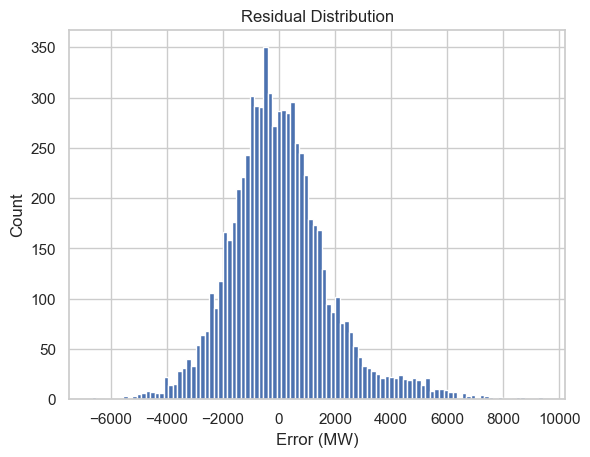

In [117]:
residuals = y_test - y_pred
plt.hist(residuals, bins=100)
plt.title("Residual Distribution")
plt.xlabel("Error (MW)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [118]:
coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": lr.coef_})
print(coeff_df.sort_values(by="Coefficient", key=abs, ascending=False))

            Feature  Coefficient
11      dayofweek_4 -3208.252964
10      dayofweek_3 -3072.622208
9       dayofweek_2 -2917.879276
8       dayofweek_1 -2539.713374
6        is_weekend -2511.578232
12      dayofweek_5 -1969.489279
7        is_holiday -1200.613834
13      dayofweek_6  -542.088953
5              hour  -194.990354
2          temp_t-1    26.978465
3    rad_direct_t-1    -1.916154
4   rad_diffuse_t-1    -1.782613
0          load_t-1     0.828905
1         load_t-24     0.227377


In [119]:
tscv = TimeSeriesSplit(n_splits=5)
mae_scores, rmse_scores, mape_scores = [], [], []

alphas = [0.001, 0.01, 0.1, 1, 10]
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = make_pipeline(
        StandardScaler(),
        RidgeCV(alphas=alphas, cv=5)
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = MAE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)

    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)

print(f"Avg MAE: {np.mean(mae_scores):.2f} MW")
print(f"Avg RMSE: {np.mean(rmse_scores):.2f} MW")
print(f"Avg MAPE: {np.mean(mape_scores):.2f} %")

Avg MAE: 1418.02 MW
Avg RMSE: 1896.75 MW
Avg MAPE: 2.65 %


In [120]:
split_idx = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

model = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, cv=5)
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

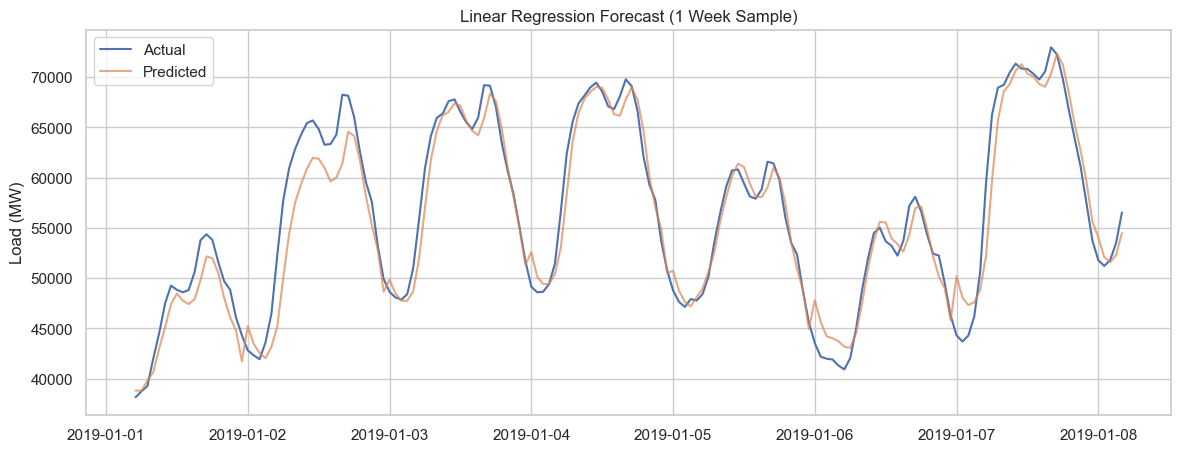

In [121]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.index[:168], y_test[:168], label="Actual")
plt.plot(y_test.index[:168], y_pred[:168], label="Predicted", alpha=0.7)
plt.title("Linear Regression Forecast (1 Week Sample)")
plt.ylabel("Load (MW)")
plt.legend()
plt.grid(True)
plt.show()

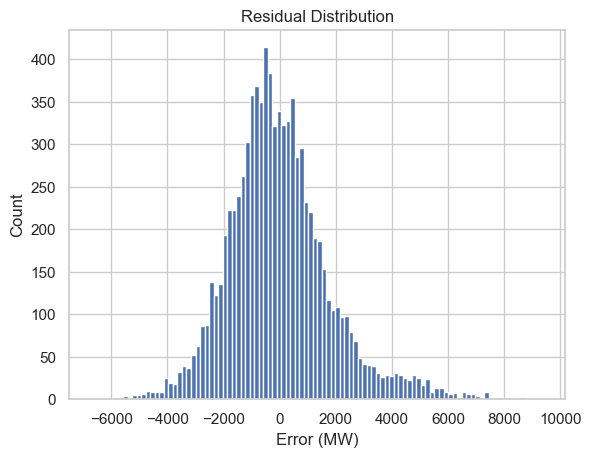

In [122]:
residuals = y_test - y_pred
plt.hist(residuals, bins=100)
plt.title("Residual Distribution")
plt.xlabel("Error (MW)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

## Random Forest

In [124]:
# Define feature columns
feature_cols = [
    "load_t-1", "load_t-24",
    "temp_t-1", "rad_direct_t-1", "rad_diffuse_t-1",
    "hour", "dayofweek", "is_weekend", "is_holiday"
]

# Drop any remaining NaNs (just in case)
model_df = df[feature_cols].dropna()

# Feature matrix (X) and target vector (y)
X = model_df[feature_cols]
X = pd.get_dummies(X, columns=["dayofweek"], drop_first=True)
y = df.loc[X.index, "load"]

In [127]:
from sklearn.ensemble import RandomForestRegressor

# Train/test split (time-based)
split_idx = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mae = MAE(y_test, y_pred)
rmse = RMSE(y_test, y_pred)
mape = MAPE(y_test, y_pred)

print(f"Random Forest MAE:  {mae:.2f} MW")
print(f"Random Forest RMSE: {rmse:.2f} MW")
print(f"Random Forest MAPE: {mape:.2f} %")

Random Forest MAE:  543.94 MW
Random Forest RMSE: 741.97 MW
Random Forest MAPE: 1.00 %


In [128]:
tscv = TimeSeriesSplit(n_splits=5)
mae_scores, rmse_scores, mape_scores = [], [], []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = MAE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)

    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)

print(f"Avg MAE: {np.mean(mae_scores):.2f} MW")
print(f"Avg RMSE: {np.mean(rmse_scores):.2f} MW")
print(f"Avg MAPE: {np.mean(mape_scores):.2f} %")

Avg MAE: 575.20 MW
Avg RMSE: 807.77 MW
Avg MAPE: 1.05 %


In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_absolute_error

tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "auto"]
}

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

rf = RandomForestRegressor(min_samples_split=2, max_feature=None, max_depth=None random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring=mae_scorer,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)
print(f"Best validation MAE: {-grid_search.best_score_:.2f} MW")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Best validation MAE: 631.73 MW


In [134]:
tscv = TimeSeriesSplit(n_splits=5)
mae_scores, rmse_scores, mape_scores = [], [], []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = RandomForestRegressor(
        n_estimators=200, 
        max_features=None,
        max_depth=None,
        min_samples_leaf=1,
        n_jobs=-1,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = MAE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)

    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)

print(f"Avg MAE: {np.mean(mae_scores):.2f} MW")
print(f"Avg RMSE: {np.mean(rmse_scores):.2f} MW")
print(f"Avg MAPE: {np.mean(mape_scores):.2f} %")

Avg MAE: 501.07 MW
Avg RMSE: 712.75 MW
Avg MAPE: 0.91 %


In [135]:
tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": [1, "sqrt", None]
}

mae_scorer = make_scorer(RMSE, greater_is_better=False)

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring=mae_scorer,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)
print(f"Best validation RMSE: {-grid_search.best_score_:.2f} MW")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best validation RMSE: 712.75 MW


In [137]:
split_idx = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

rf_model = RandomForestRegressor(
    n_estimators=200, 
    max_features=None,
    max_depth=None,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = MAE(y_test, y_pred)
rmse = RMSE(y_test, y_pred)
mape = MAPE(y_test, y_pred)

print(f"Random Forest MAE:  {mae:.2f} MW")
print(f"Random Forest RMSE: {rmse:.2f} MW")
print(f"Random Forest MAPE: {mape:.2f} %")

Random Forest MAE:  457.48 MW
Random Forest RMSE: 620.09 MW
Random Forest MAPE: 0.84 %


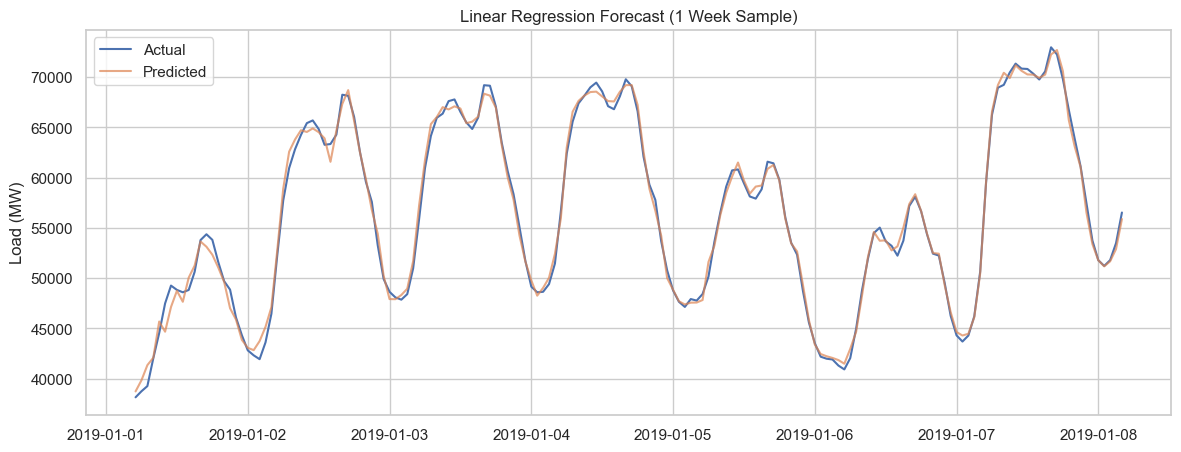

In [138]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.index[:168], y_test[:168], label="Actual")
plt.plot(y_test.index[:168], y_pred[:168], label="Predicted", alpha=0.7)
plt.title("Linear Regression Forecast (1 Week Sample)")
plt.ylabel("Load (MW)")
plt.legend()
plt.grid(True)
plt.show()

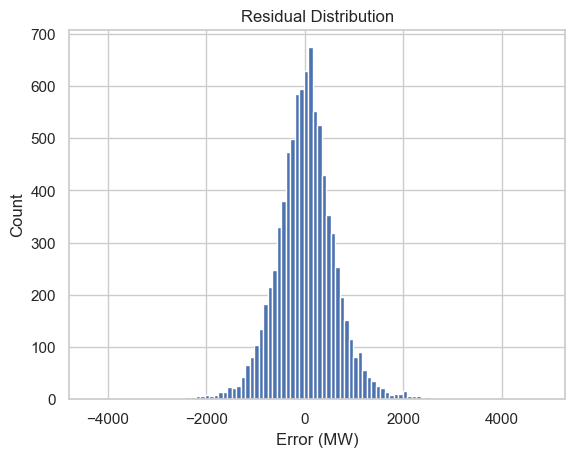

In [139]:
residuals = y_test - y_pred
plt.hist(residuals, bins=100)
plt.title("Residual Distribution")
plt.xlabel("Error (MW)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

## XGBoost

In [140]:
from xgboost import XGBRegressor

split_idx = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


In [141]:
# Basic first model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=1
)

# Fit model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict
y_pred = xgb_model.predict(X_test)

# Metrics
mae = MAE(y_test, y_pred)
rmse = RMSE(y_test, y_pred)
mape = MAPE(y_test, y_pred)

print(f"XGBoost MAE:  {mae:.2f} MW")
print(f"XGBoost RMSE: {rmse:.2f} MW")
print(f"XGBoost MAPE: {mape:.2f}%")
